In [40]:
import pandas as pd
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, RationalQuadratic, RBF
import warnings
warnings.filterwarnings("ignore")

In [46]:
symbols = pd.read_csv('futures.txt', sep=';', header = 0)

In [47]:
from utils import get_df_symbols
datasets_years, datasets = get_df_symbols(symbols, verbose=True)

Getting Gold dataset
Getting Petroleum WTI dataset
Getting Natural Gas dataset
Getting Silver dataset
Getting RBOB Gasoline dataset
Getting Heating Oil dataset
Getting Platinum dataset
Getting Copper dataset
Getting Palladium dataset
Getting Corn Futures dataset
Getting Oat Futures dataset
Getting KC HRW Wheat Futures dataset
Getting Rough Rice Futures dataset
Getting Soybean Futures dataset
Getting Soybean Oil Futures dataset
Getting Cocoa dataset
Getting Coffee dataset
Getting Cotton dataset
Getting Sugar dataset


In [49]:
from utils import get_Xs_ys
Xs, ys = get_Xs_ys(datasets_years)

In [50]:
kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() * WhiteKernel()

In [51]:
years_pred, days_before, years_before = range(2011, 2022), 60, 6

In [52]:
from strategy import Strategy

strategies = {}
for name in list(Xs.keys()):
    print(name)
    strategies_name = {}
    for year_pred in years_pred:
        print('   - Operating at {}'.format(year_pred))

        strategy = Strategy(kernel=kernel, X=Xs[name], y=ys[name], year_pred=year_pred, years_before=years_before, days_before=days_before)
        strategy.get_train_pred()
        strategy.get_prediction()
        strategy.buy_sell()

        strategies_name[str(year_pred)] = strategy

    strategies[name] = strategies_name

Gold
   - Operating at 2011
   - Operating at 2012
   - Operating at 2013
   - Operating at 2014
   - Operating at 2015
   - Operating at 2016
   - Operating at 2017
   - Operating at 2018
   - Operating at 2019
   - Operating at 2020
   - Operating at 2021
Petroleum WTI
   - Operating at 2011
   - Operating at 2012
   - Operating at 2013
   - Operating at 2014
   - Operating at 2015
   - Operating at 2016
   - Operating at 2017
   - Operating at 2018
   - Operating at 2019
   - Operating at 2020
   - Operating at 2021
Natural Gas
   - Operating at 2011
   - Operating at 2012
   - Operating at 2013
   - Operating at 2014
   - Operating at 2015
   - Operating at 2016
   - Operating at 2017
   - Operating at 2018
   - Operating at 2019
   - Operating at 2020
   - Operating at 2021
Silver
   - Operating at 2011
   - Operating at 2012
   - Operating at 2013
   - Operating at 2014
   - Operating at 2015
   - Operating at 2016
   - Operating at 2017
   - Operating at 2018
   - Operating at 2

In [53]:
actions = {}
for name in list(strategies.keys()):
    df = pd.DataFrame(columns=['Adj Close', 'Action'])
    for year in years_pred:
        df_year = pd.DataFrame(datasets[name]['Adj Close'].loc[str(year)])
        df_year['Action'] = strategies[name][str(year)].action
        df = pd.concat([df, df_year.reset_index()])
    actions[name] = df.reset_index(drop=True)

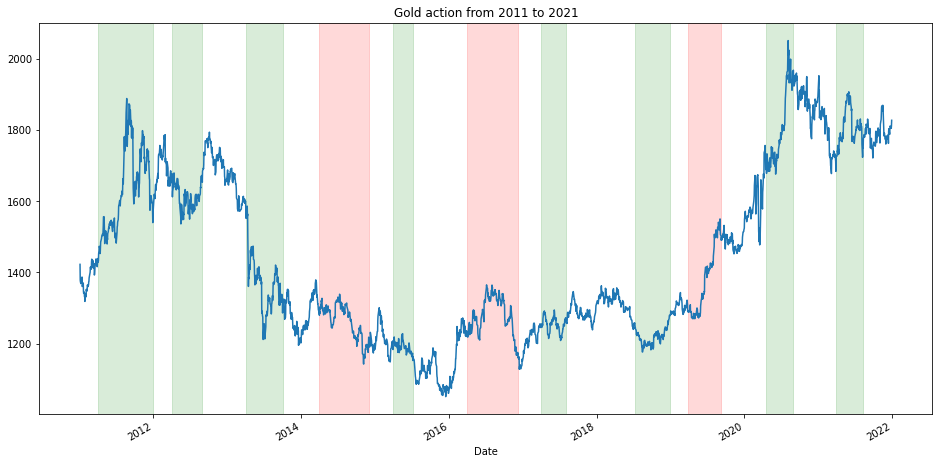

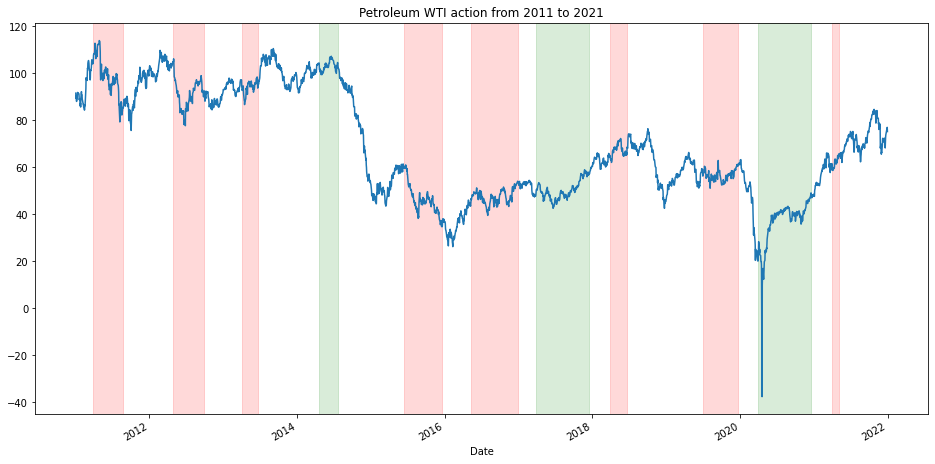

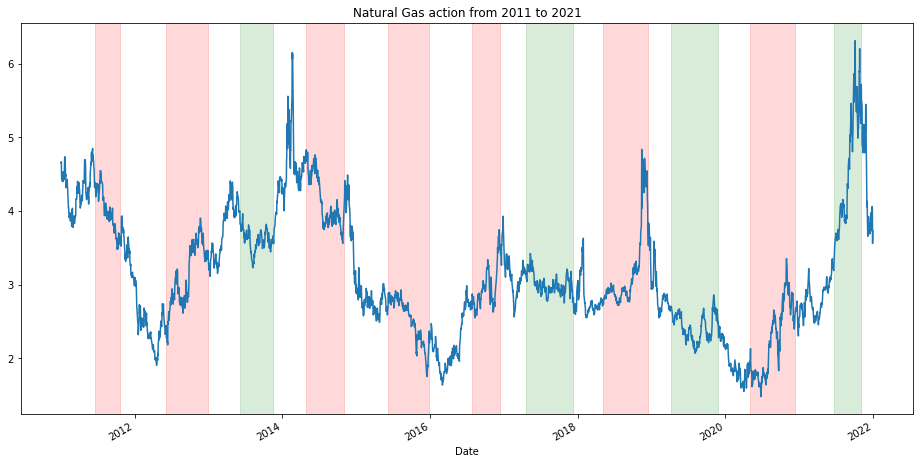

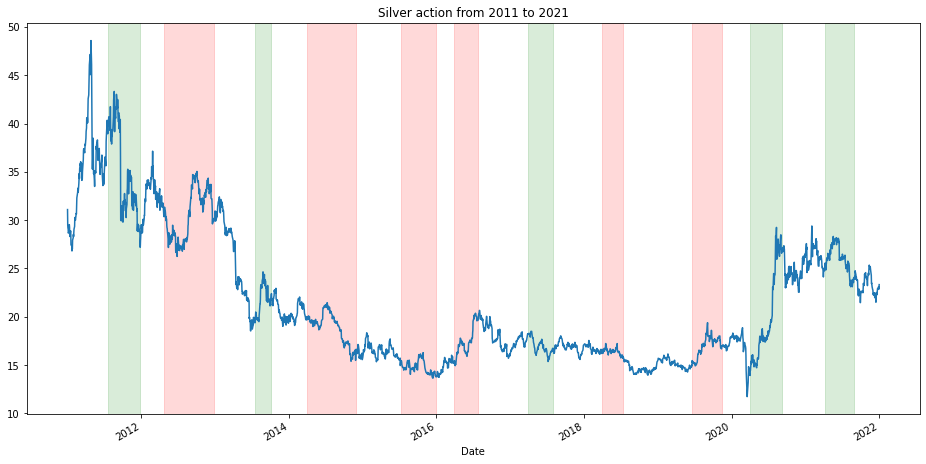

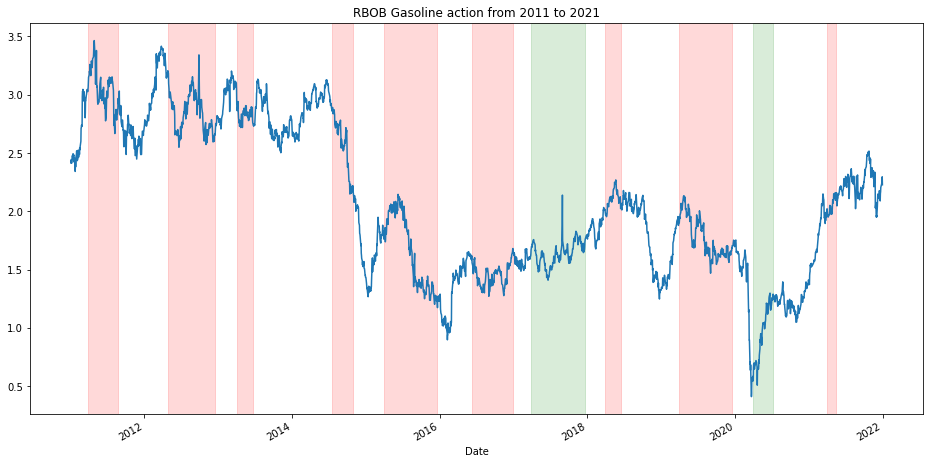

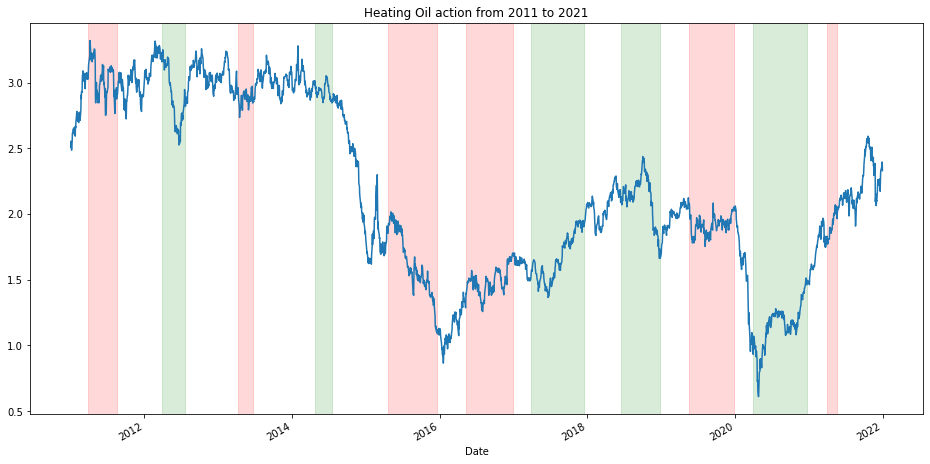

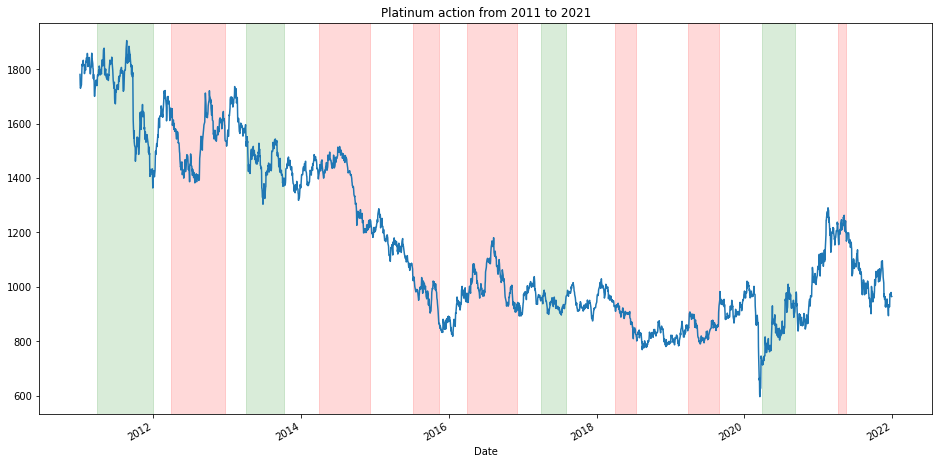

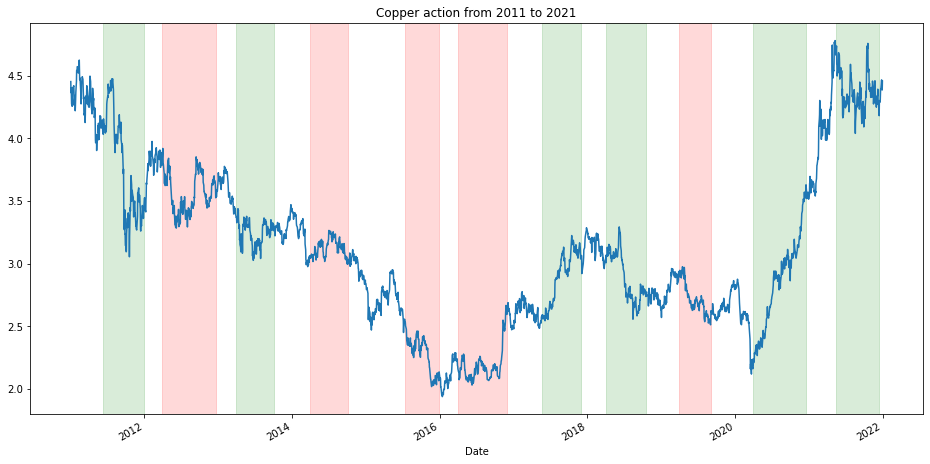

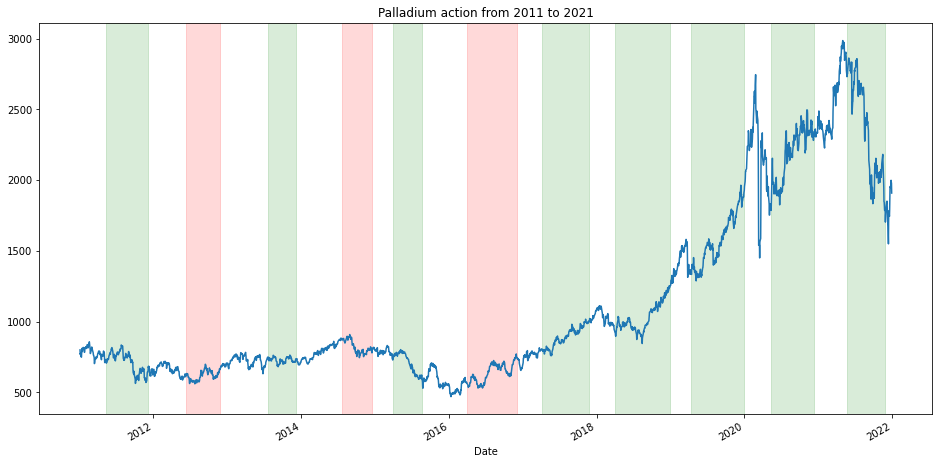

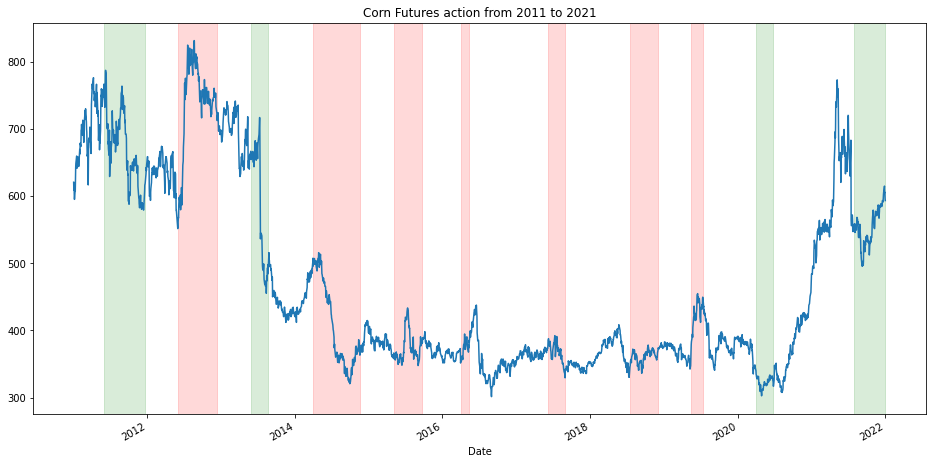

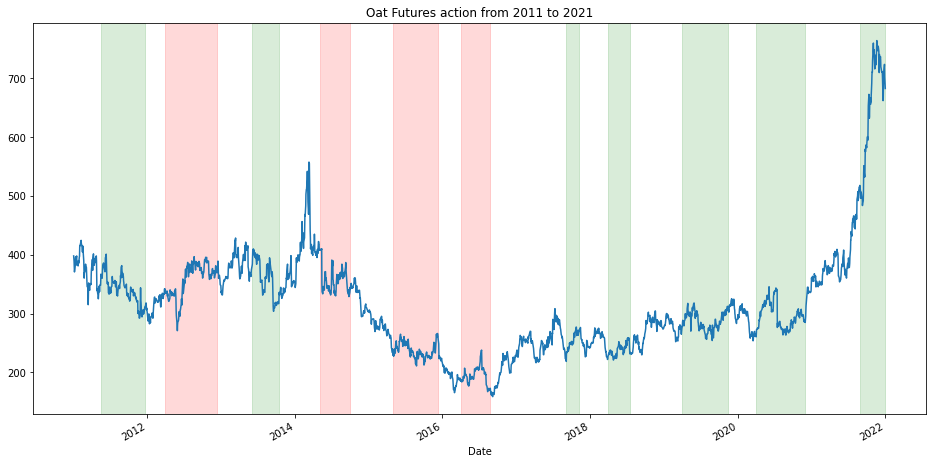

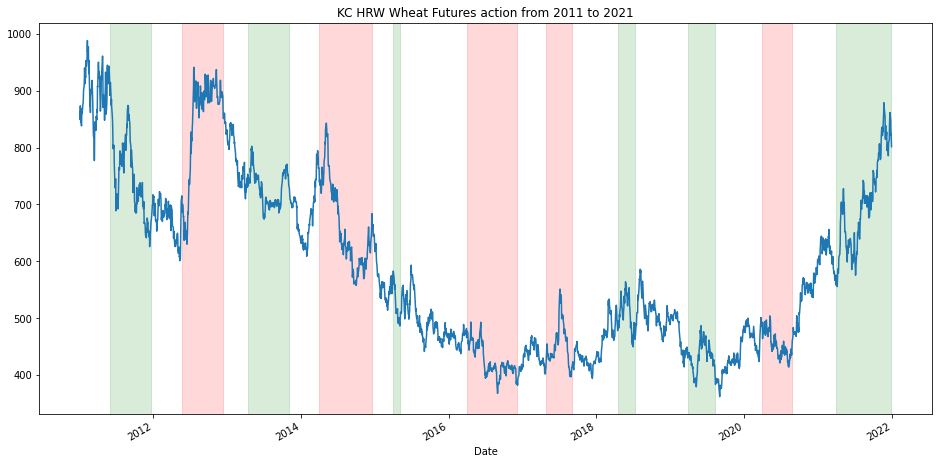

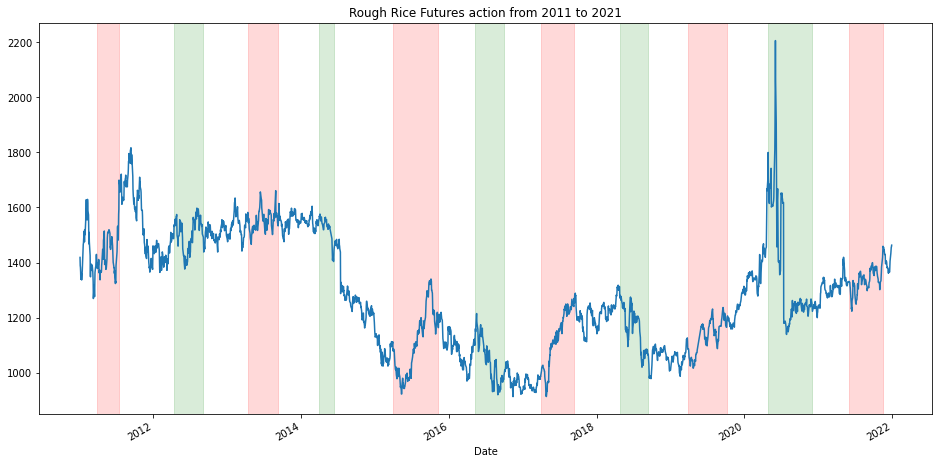

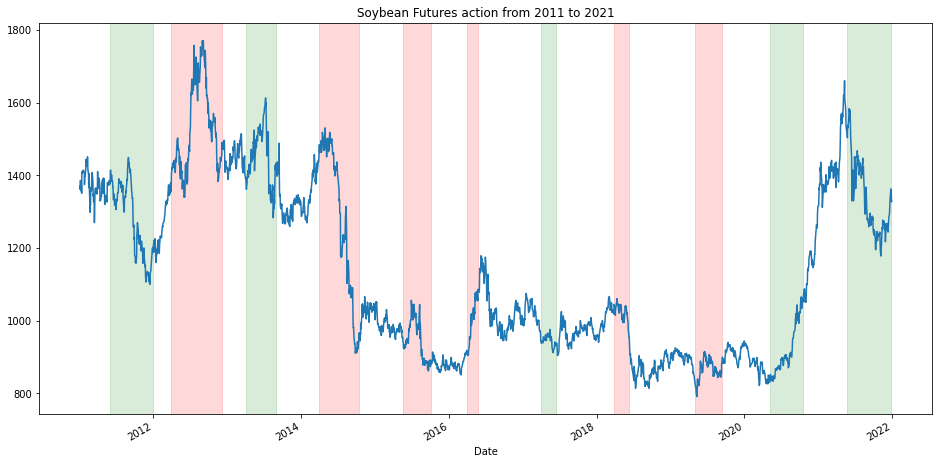

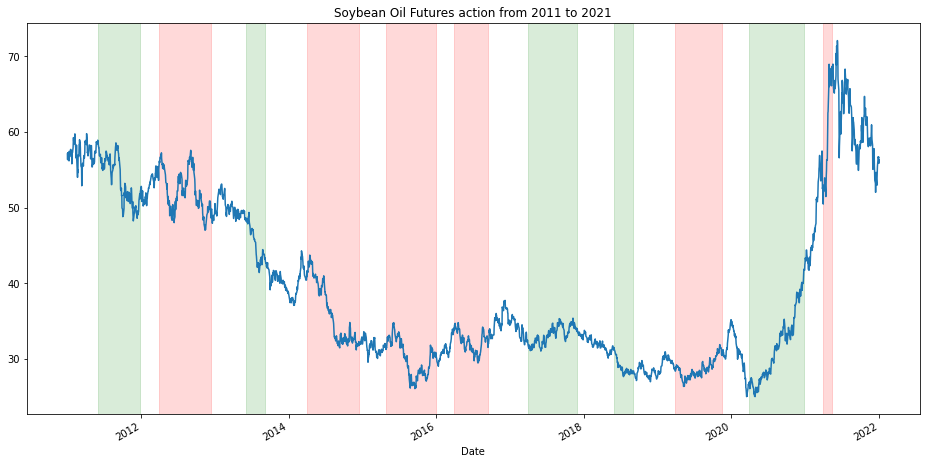

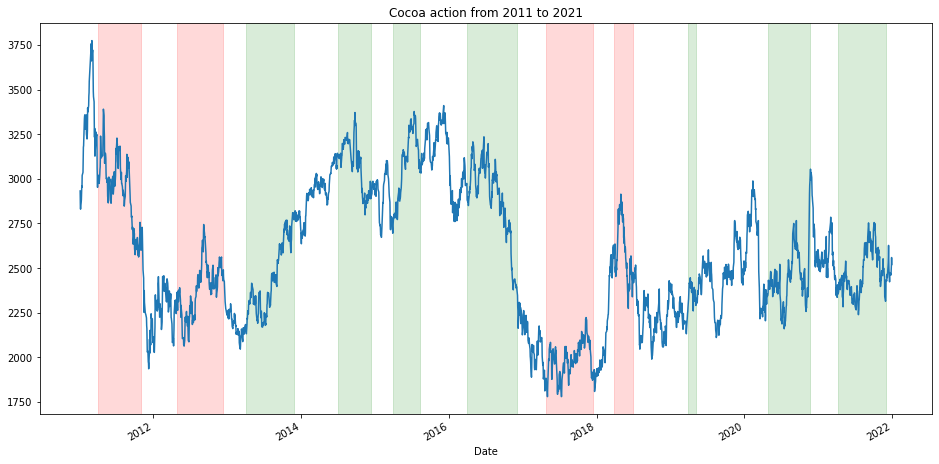

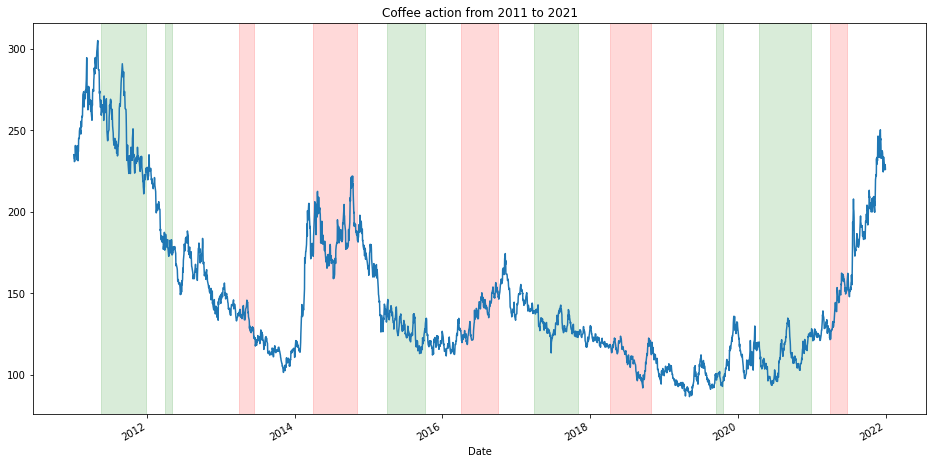

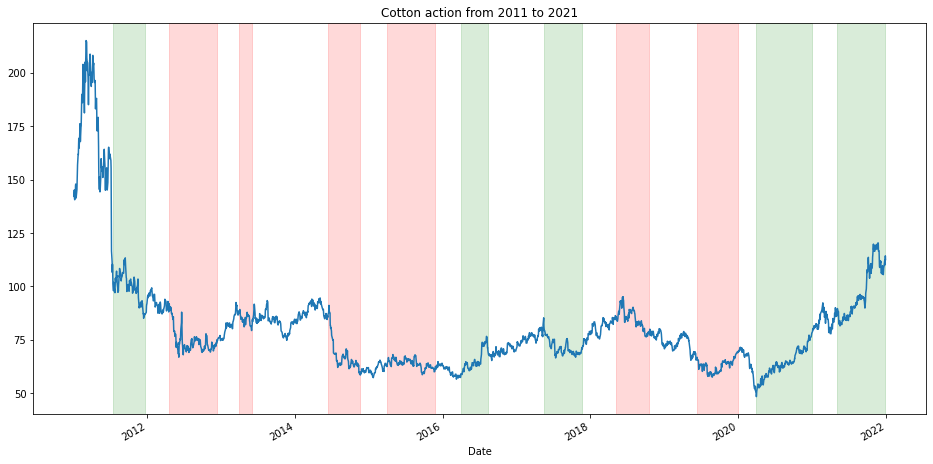

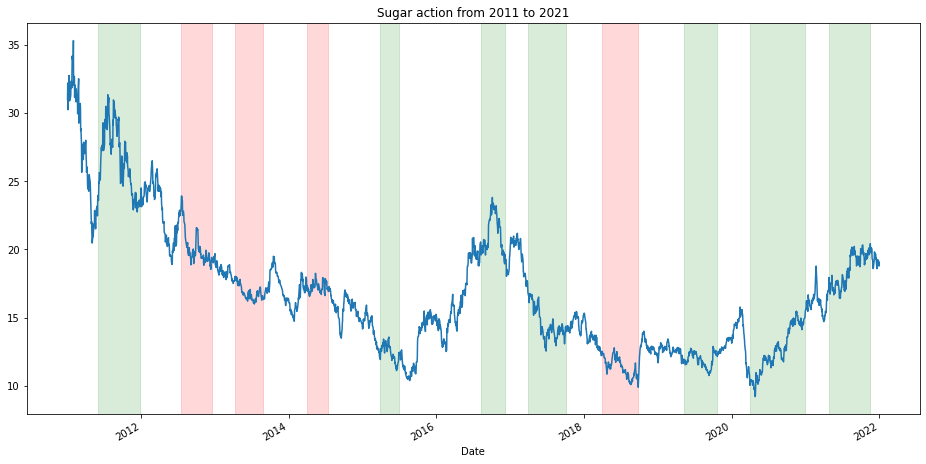

In [54]:
for name in list(actions.keys()):

    hco = actions[name].plot(x='Date', y='Adj Close', figsize=(16,8), legend=False, title='{} action from {} to {}'.format(name, min(years_pred), max(years_pred)))

    buys = actions[name]['Action'][actions[name]['Action'] == 1].index
    buys_limits = [buys[0]]
    for i in range(len(buys)-1):
        if (buys[i] - buys[i - 1] > 1) | (buys[i + 1] - buys[i] > 1):
            buys_limits.append(buys[i])
    buys_limits.append(buys[-1])

    sells = actions[name]['Action'][actions[name]['Action'] == -1].index
    sells_limits = [sells[0]]
    for i in range(len(sells)-1):
        if (sells[i] - sells[i - 1] > 1) | (sells[i + 1] - sells[i] > 1):
            sells_limits.append(sells[i])
    sells_limits.append(sells[-1])

    for i in range(len(buys_limits) // 2):
        p = hco.axvspan(actions[name]['Date'][buys_limits[2 * i]], actions[name]['Date'][buys_limits[2 * i + 1]], alpha=0.15, color='green')

    for i in range(len(sells_limits) // 2):
        p = hco.axvspan(actions[name]['Date'][sells_limits[2 * i]], actions[name]['Date'][sells_limits[2 * i + 1]], alpha=0.15, color='red')

    f = hco.get_figure()
    f.savefig('Figures/{}.png'.format(name))

In [13]:
# TODO: Hacer backtest de estrategia conjunto